In [1]:
from GAMcalc import *
import propagator 
import wignerD as wd

## Sets of Ks

In [2]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2
    return [k1, k2, k3]

def set4Ks(K):
    k1=np.array([1,0,0])*K
    k2=np.array([-1,0,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

In [3]:
def set4Ks1(K):
    k1=np.array([1,0,0])*K
    k2=np.array([1,0,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks2(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0.5,0.5*np.sqrt(3),0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks3(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0,1,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks4(K):
    k1=np.array([-1,0,1])/np.sqrt(2)*K
    k2=np.array([-1,0,-1])/np.sqrt(2)*K
    k3=np.array([1,1,0])/np.sqrt(2)*K
    k4=np.array([1,-1,0])/np.sqrt(2)*K
    return [k1, k2, k3, k4]

## Simple examples

In [4]:
# N = 10
# FA = 0.5
# K = 10
# CHI = 0

# pset=propagator.prop_set(nlam=10)
# wigset = wd.wigner_d_vals()

# KS = spinodal(pset, N, FA)
# Ks3 = set3Ks(KS)
# Ks4 = set4Ks(KS)

# print(gamma2(pset, N, FA, K, CHI))
# print(gamma3(pset, N, FA, Ks3))
# print(gamma4(pset, wigset, N, FA, Ks4))

## Gamma2

In [5]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

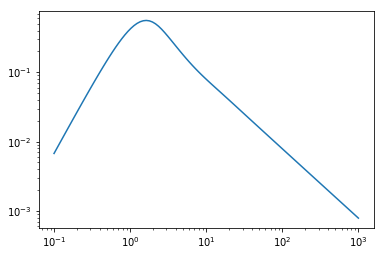

In [6]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [7]:
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(pset, N, FA)

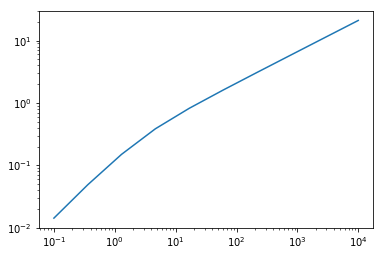

In [8]:
plt.loglog(NV, 1/KSV)
plt.show()

## Gamma3

In [ ]:
FAV = np.linspace(.2, .5, 21)
pset=propagator.prop_set(nlam=10)

N = 1000
GAM3N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1000[ind] = gamma3(pset, N, FA, Ks)*N

N = 100
GAM3N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N100[ind] = gamma3(pset, N, FA, Ks)*N
    
N = 1
GAM3N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1[ind] = gamma3(pset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, -GAM3N_N1000.real, label='N=1000')
plt.plot(FAV, -GAM3N_N100.real, label='N=100')
plt.plot(FAV, -GAM3N_N1.real, label='N=1')
plt.xlabel('$f_A$')
plt.ylabel('$-N\Gamma_{3}(q^*)$')
plt.legend(loc=1)
plt.axis([.2,.5,0,200])
plt.show()

## Gamma4

In [ ]:
FAV = np.linspace(.3, .5, 21)
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1000
GAM4N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1000[ind] = gamma4(pset, wigset, N, FA, Ks)*N

N = 100
GAM4N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N100[ind] = gamma4(pset, wigset, N, FA, Ks)*N

    
N = 10
GAM4N_N10 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N10[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    
N = 1
GAM4N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1[ind] = gamma4(pset, wigset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, GAM4N_N1000.real, label='N=1000')
plt.plot(FAV, GAM4N_N100.real, label='N=100')
plt.plot(FAV, GAM4N_N10.real, label='N=10')
plt.plot(FAV, GAM4N_N1.real, label='N=1')
plt.axis([.3,.5,100,500])
plt.box
plt.legend(loc=1)
plt.show()

## Check numerical convergence 

In [5]:
# NV = np.logspace(0,3,11)
NV = [1e3]
G4N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

1000.0 (156.827674798+9.5578978339e-13j)


In [ ]:
NV = np.logspace(0,3,11)
G4N = np.zeros((len(NV)), dtype='complex')
S3N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

In [ ]:
plt.semilogx(NV, G4N)
plt.show()

## Write to file

In [4]:
# Figure 1 data

filename = 'data/fig1data'
f1 = open(filename, 'w')

FAV = [0.5]
NV = np.logspace(-1,3,161)

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks41 = set4Ks1(KS)
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        f1.write(' %.2f, %.2f, %.4f\n' %(N, FA, GAM4N1[ii][jj].real))
        print(' %.2f, %.2f, %.4f' %(N, FA, GAM4N1[ii][jj].real))
f1.close()

 0.10, 0.50, 104.8062
 0.11, 0.50, 104.7955
 0.11, 0.50, 104.7861
 0.12, 0.50, 104.7781
 0.13, 0.50, 104.7717
 0.13, 0.50, 104.7674
 0.14, 0.50, 104.7654
 0.15, 0.50, 104.7662
 0.16, 0.50, 104.7702
 0.17, 0.50, 104.7778
 0.18, 0.50, 104.7897
 0.19, 0.50, 104.8063
 0.20, 0.50, 104.8285
 0.21, 0.50, 104.8568
 0.22, 0.50, 104.8921
 0.24, 0.50, 104.9353
 0.25, 0.50, 104.9873
 0.27, 0.50, 105.0491
 0.28, 0.50, 105.1220
 0.30, 0.50, 105.2069
 0.32, 0.50, 105.3054
 0.33, 0.50, 105.4188
 0.35, 0.50, 105.5484
 0.38, 0.50, 105.6962
 0.40, 0.50, 105.8634
 0.42, 0.50, 106.0520
 0.45, 0.50, 106.2638
 0.47, 0.50, 106.5007
 0.50, 0.50, 106.7644
 0.53, 0.50, 107.0569
 0.56, 0.50, 107.3804
 0.60, 0.50, 107.7363
 0.63, 0.50, 108.1270
 0.67, 0.50, 108.5542
 0.71, 0.50, 109.0196
 0.75, 0.50, 109.5244
 0.79, 0.50, 110.0709
 0.84, 0.50, 110.6593
 0.89, 0.50, 111.2911
 0.94, 0.50, 111.9673
 1.00, 0.50, 112.6879
 1.06, 0.50, 113.4537
 1.12, 0.50, 114.2639
 1.19, 0.50, 115.1185
 1.26, 0.50, 116.0162
 1.33, 0.5

In [27]:
# Figure 2 data

filename = 'data/fig2data'
f2 = open(filename, 'w')

FAV = np.linspace(0.1,0.5,41)
NV = [100,50,10]

pset=propagator.prop_set(nlam=3)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks3 = set3Ks(KS)
        Ks41 = set4Ks1(KS)
        Ks42 = set4Ks2(KS)
        Ks43 = set4Ks3(KS)
        Ks44 = set4Ks4(KS)
        
        GAM3N[ii][jj] = gamma3(pset, N, FA, Ks3)*N
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        GAM4N2[ii][jj] = gamma4(pset, wigset, N, FA, Ks42)*N
        GAM4N3[ii][jj] = gamma4(pset, wigset, N, FA, Ks43)*N
        GAM4N4[ii][jj] = gamma4(pset, wigset, N, FA, Ks44)*N
        f2.write(' %.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f\n' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
        print('%.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
f2.close()

100.00, 0.10, -1264.9813, 27294.0313, 27383.3213, 27383.3059, 27474.9040
100.00, 0.11, -965.2800, 19036.6442, 19116.6787, 19118.1349, 19198.4514
100.00, 0.12, -754.4908, 13713.9342, 13785.9025, 13788.2529, 13859.3408
100.00, 0.13, -601.7583, 10153.3866, 10218.2874, 10221.1675, 10284.5358
100.00, 0.14, -488.2127, 7694.2668, 7753.0418, 7756.2271, 7813.1176
100.00, 0.15, -401.9290, 5948.9895, 6002.4643, 6005.8130, 6057.2316
100.00, 0.16, -335.0722, 4679.9987, 4728.9458, 4732.3794, 4779.1950
100.00, 0.17, -282.4414, 3739.2147, 3784.1964, 3787.6492, 3830.4981
100.00, 0.18, -240.3798, 3028.6234, 3070.1583, 3073.5942, 3113.0328
100.00, 0.19, -206.3190, 2483.1500, 2521.6850, 2525.0835, 2561.5781
100.00, 0.20, -178.4199, 2058.5979, 2094.4922, 2097.8362, 2131.7609
100.00, 0.21, -155.3186, 1723.7749, 1757.3493, 1760.6319, 1792.3117
100.00, 0.22, -136.0091, 1456.7599, 1488.2769, 1491.4915, 1521.1926
100.00, 0.23, -119.7197, 1241.4519, 1271.1543, 1274.3022, 1302.2630
100.00, 0.24, -105.8682, 1066.2